In [2]:
import os
import random
import numpy as np       # need older numpy for sweetviz compatibility pip install numpy==1.23.5
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sweetviz as sv
from pathlib import Path
from pandas.tseries.holiday import USFederalHolidayCalendar

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor  # pip install lightgbm

# Detect the original notebook directory (only set once)
if "ORIGINAL_WORKDIR" not in globals():
    ORIGINAL_WORKDIR = Path().resolve()  # Save the initial notebook directory

# Move up one level from the original location
parent_dir = ORIGINAL_WORKDIR.parent

# Change to the correct directory
os.chdir(parent_dir)

print(f"Working directory set to: {os.getcwd()}")

Working directory set to: C:\Users\csoka\Desktop\delay_prediction


In [3]:
# Save the requirements.txt for reproducibility
!pip freeze > requirements.txt
print("Wrote requirements.txt")

Wrote requirements.txt


✅ All files have the same variables (columns).


C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\350552192.py:10: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


count    1455.000000
mean        0.845410
std         0.207236
min         0.183071
25%         0.700000
50%         0.976641
75%         1.000000
max         1.000000
Name: consistency, dtype: float64


C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\507700364.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["origin", "_dep_date", "_dep_hour"])["origin"]


Rows in PAST (<= 2018-05-31):  785392
Rows in FUTURE (>= 2018-06-01): 155495


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report output/past_data_report.html was generated.


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report output/predict_data_report.html was generated.
  origin dest  origin_domestic  dest_domestic
0    DCA  SEA                1              1
1    SEA  DCA                1              1
2    DCA  SEA                1              1
3    SEA  DCA                1              1
4    EWR  SEA                1              1
                    count  mean  std  min  25%  50%  75%  max
origin_domestic  940887.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
dest_domestic    940887.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0


C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


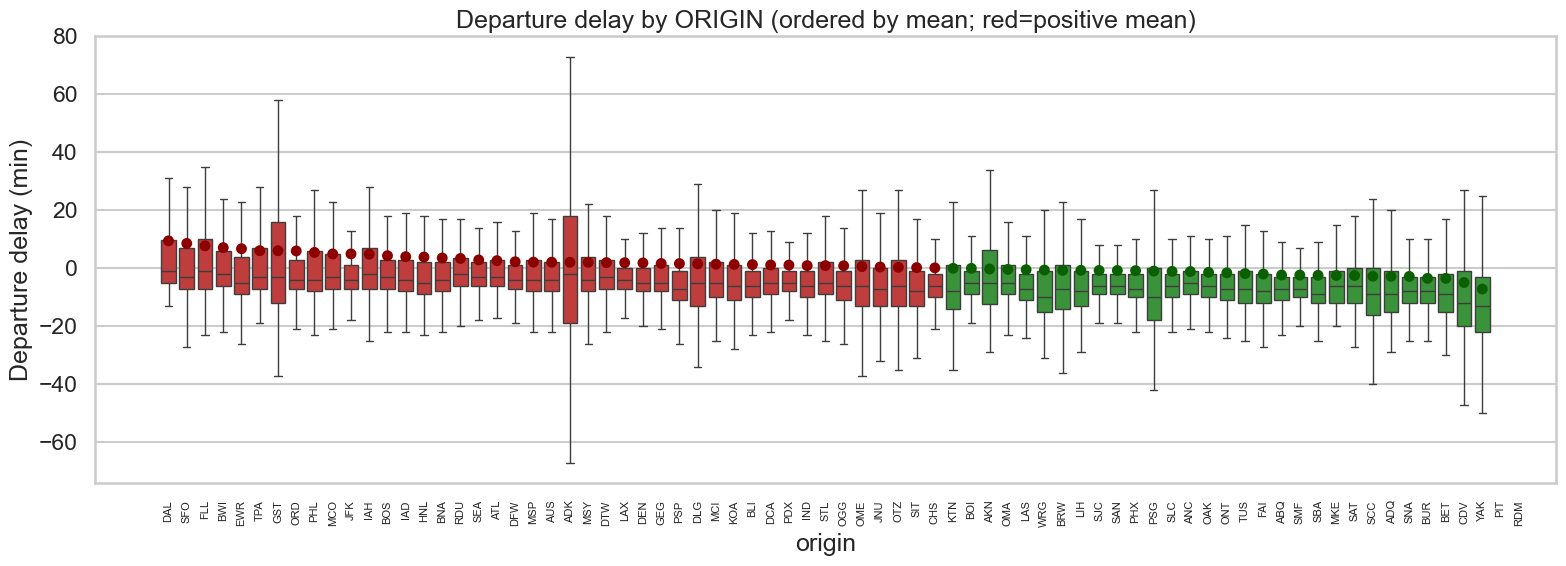

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


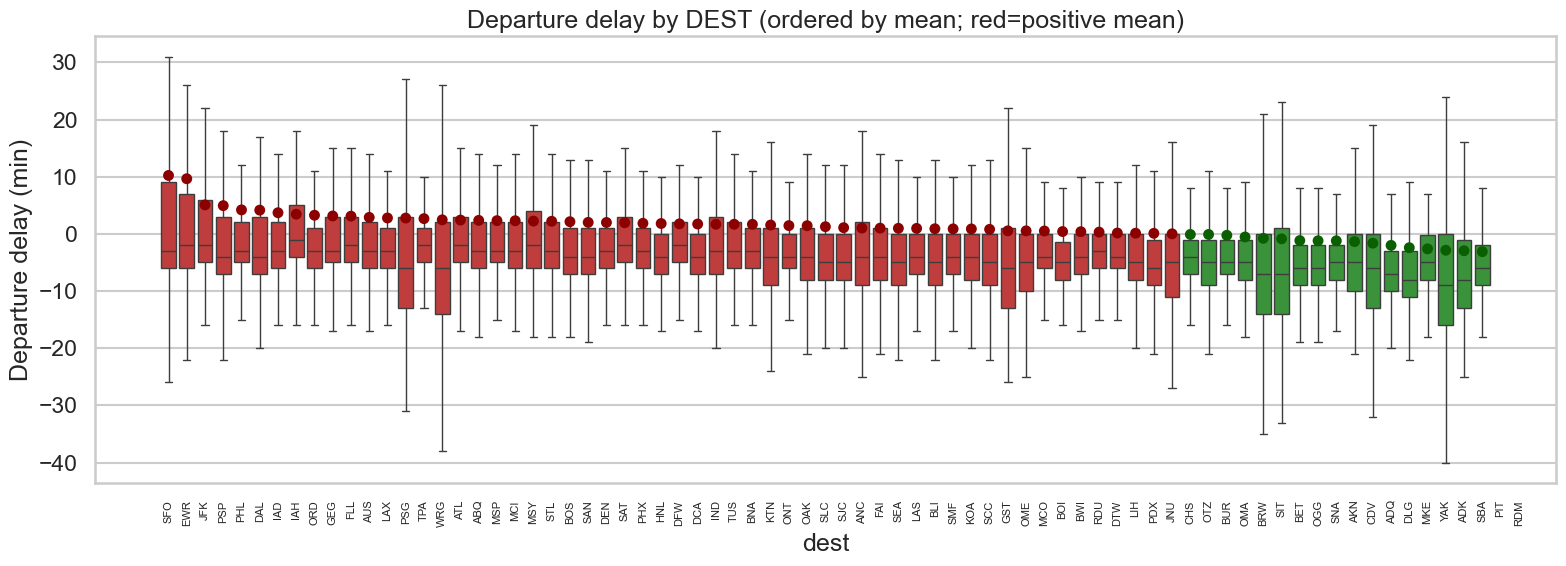

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


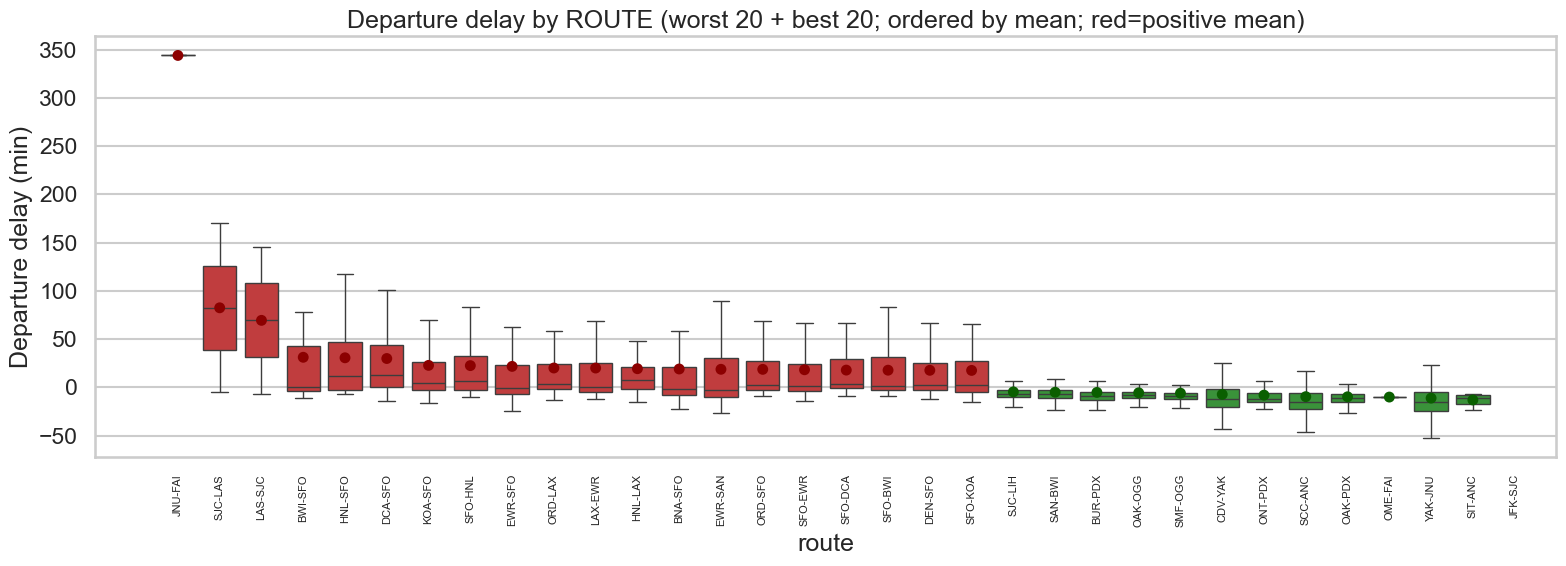

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


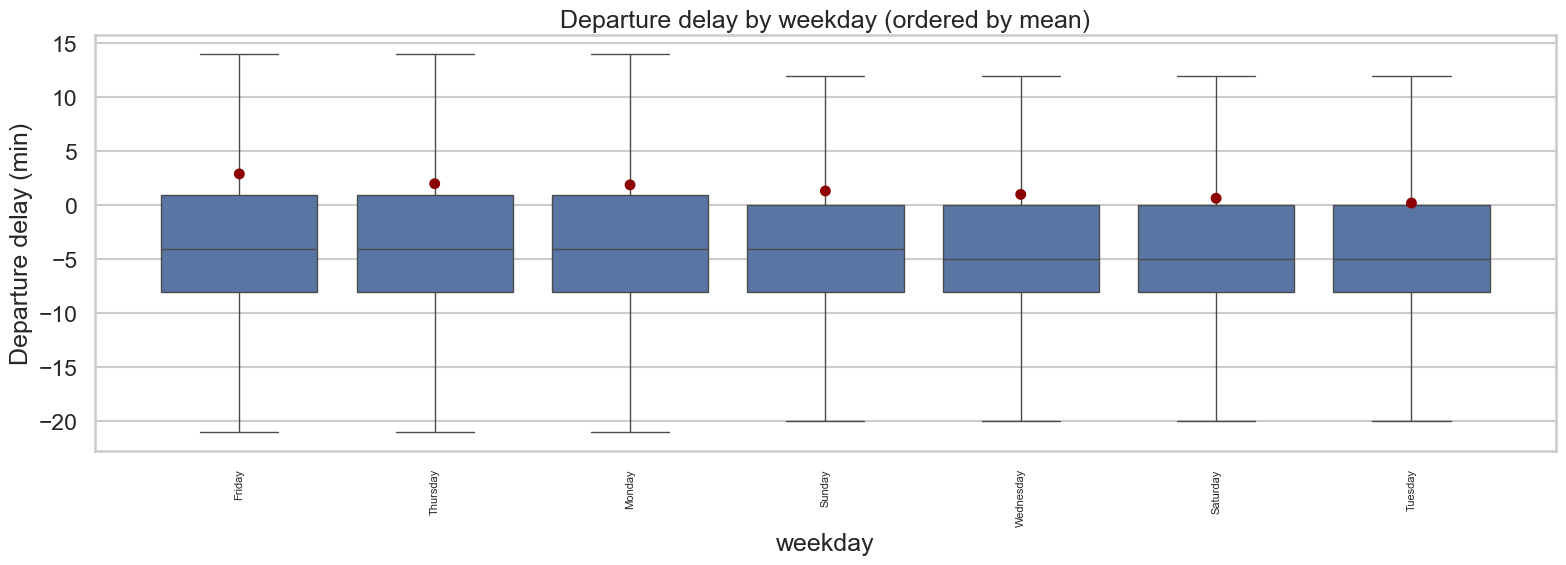

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


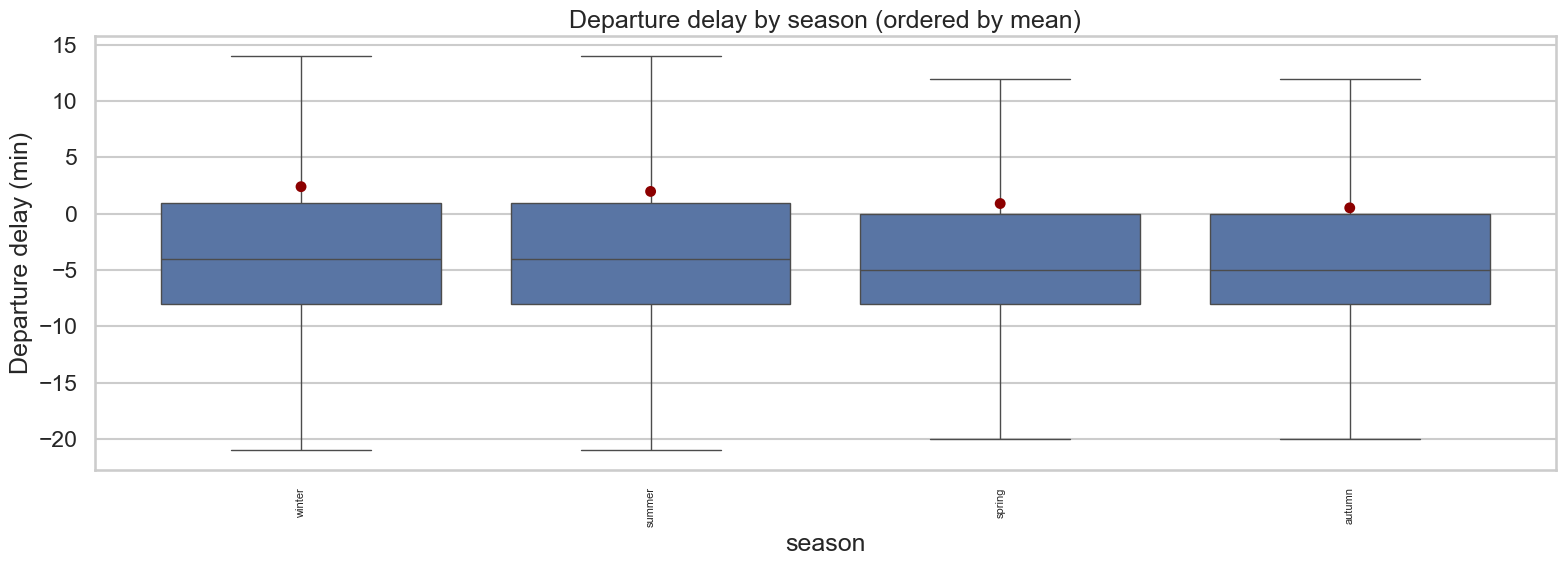

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


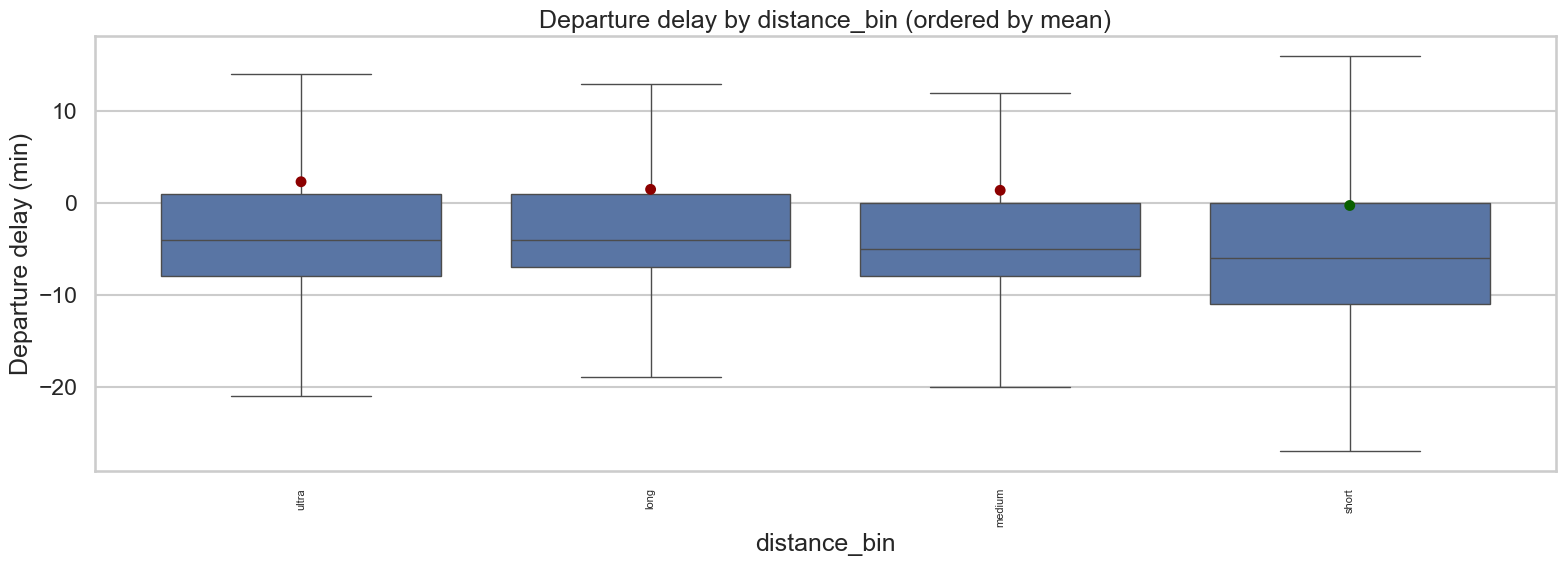

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


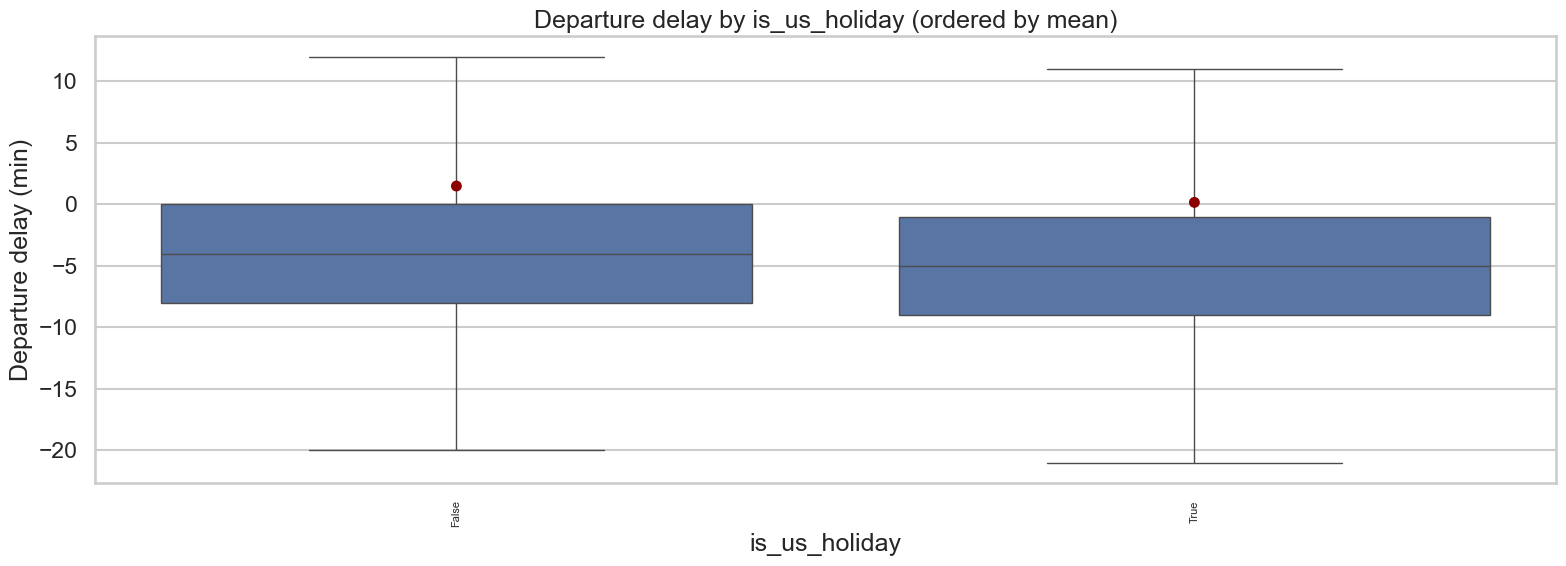

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


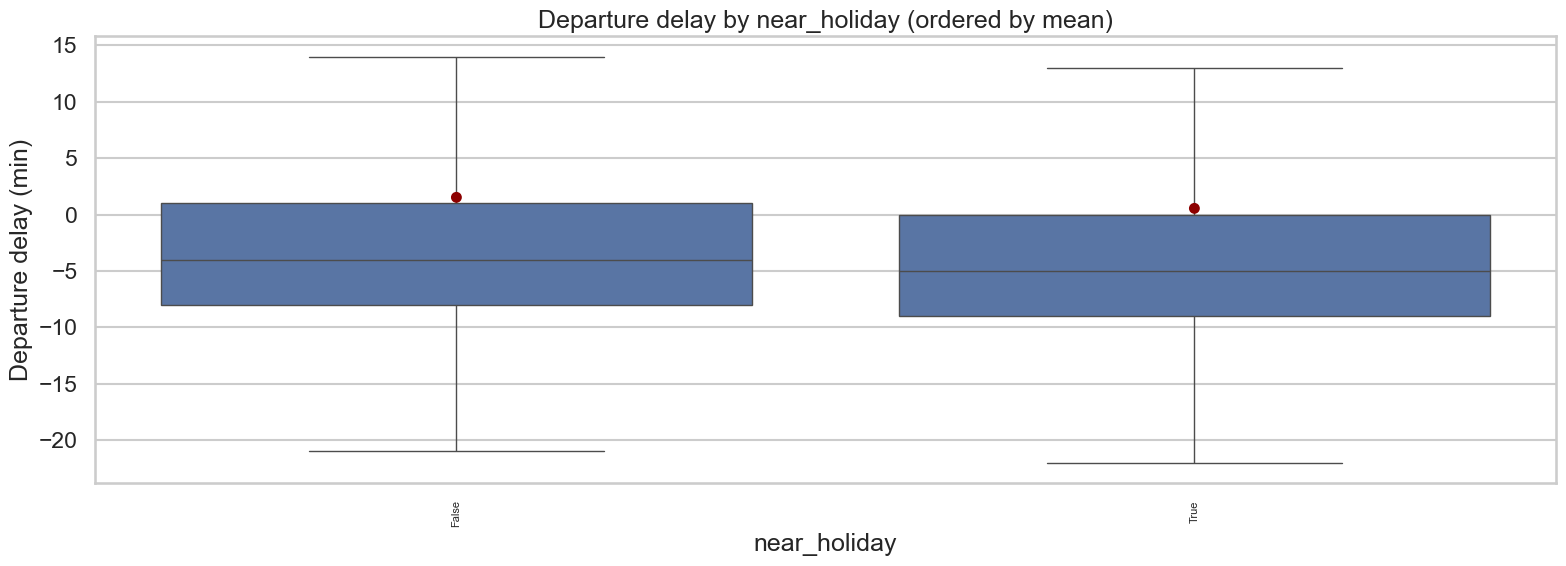

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


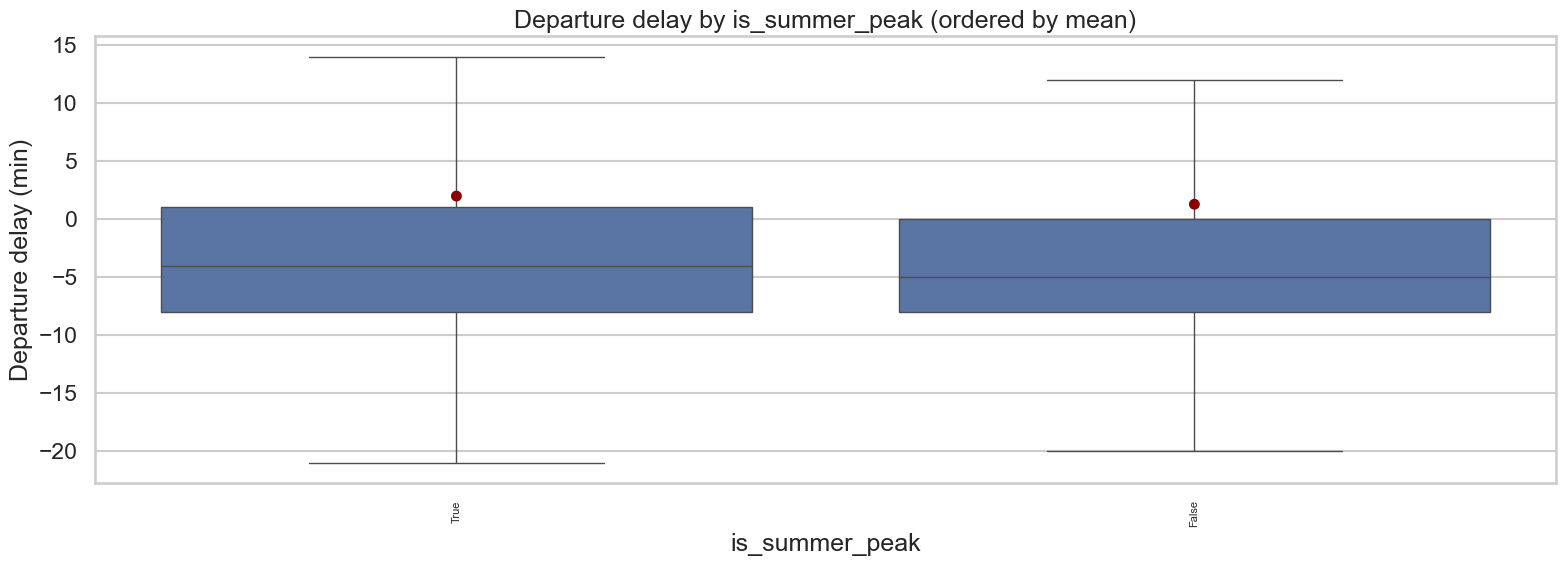

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


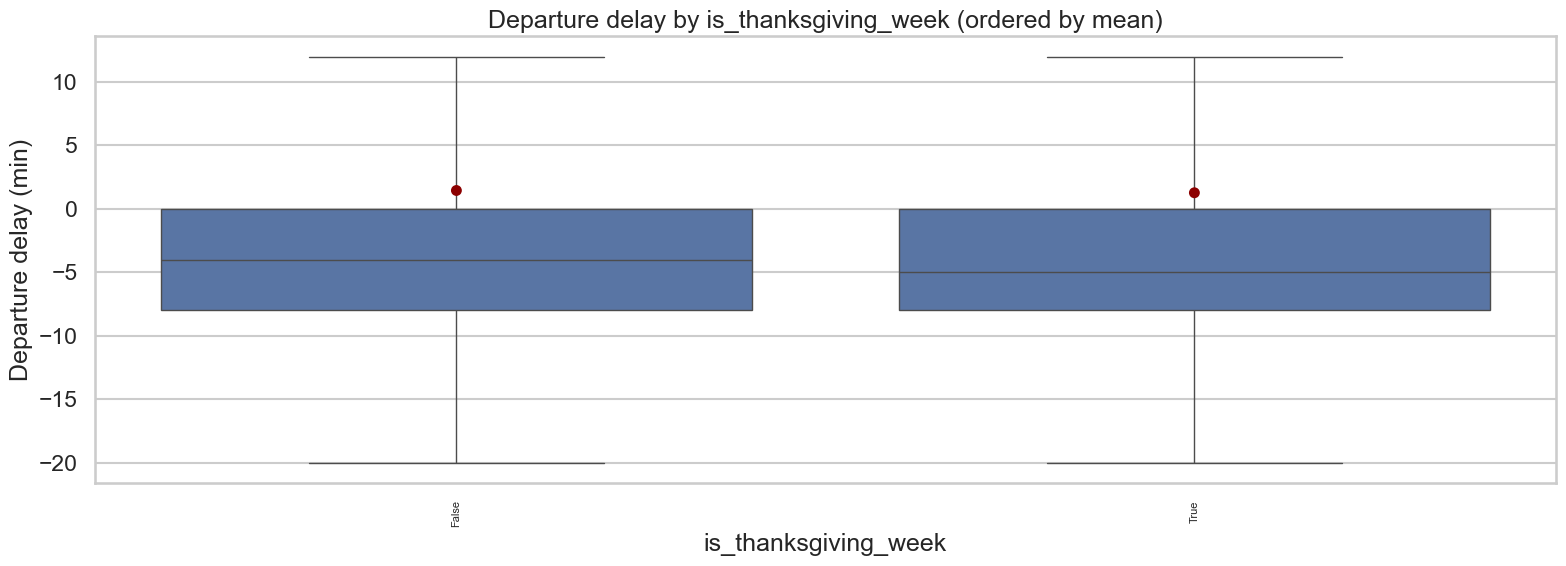

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


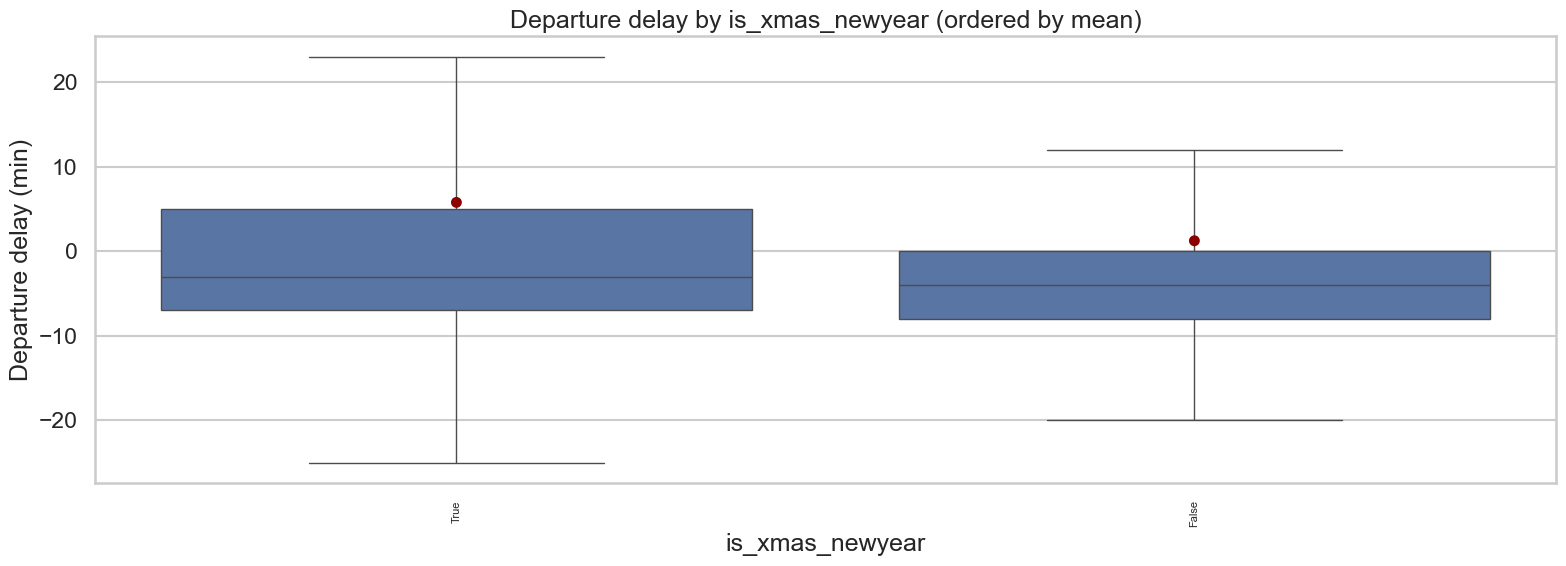

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


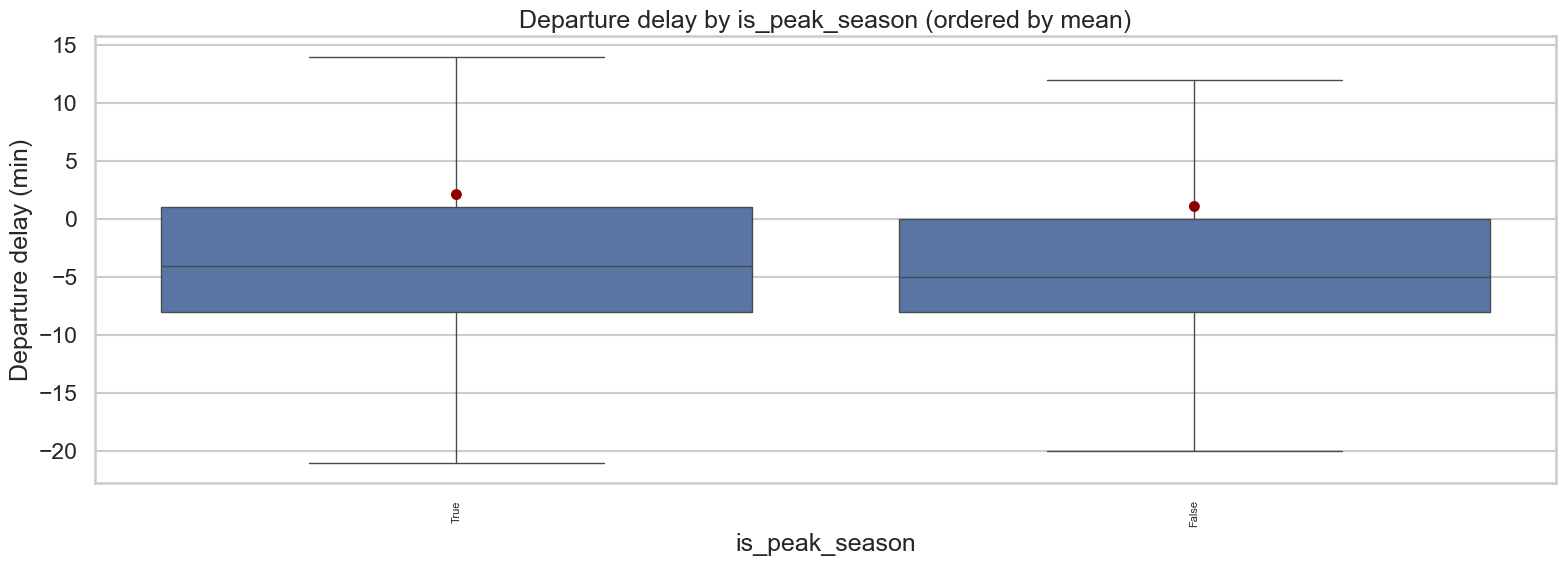

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


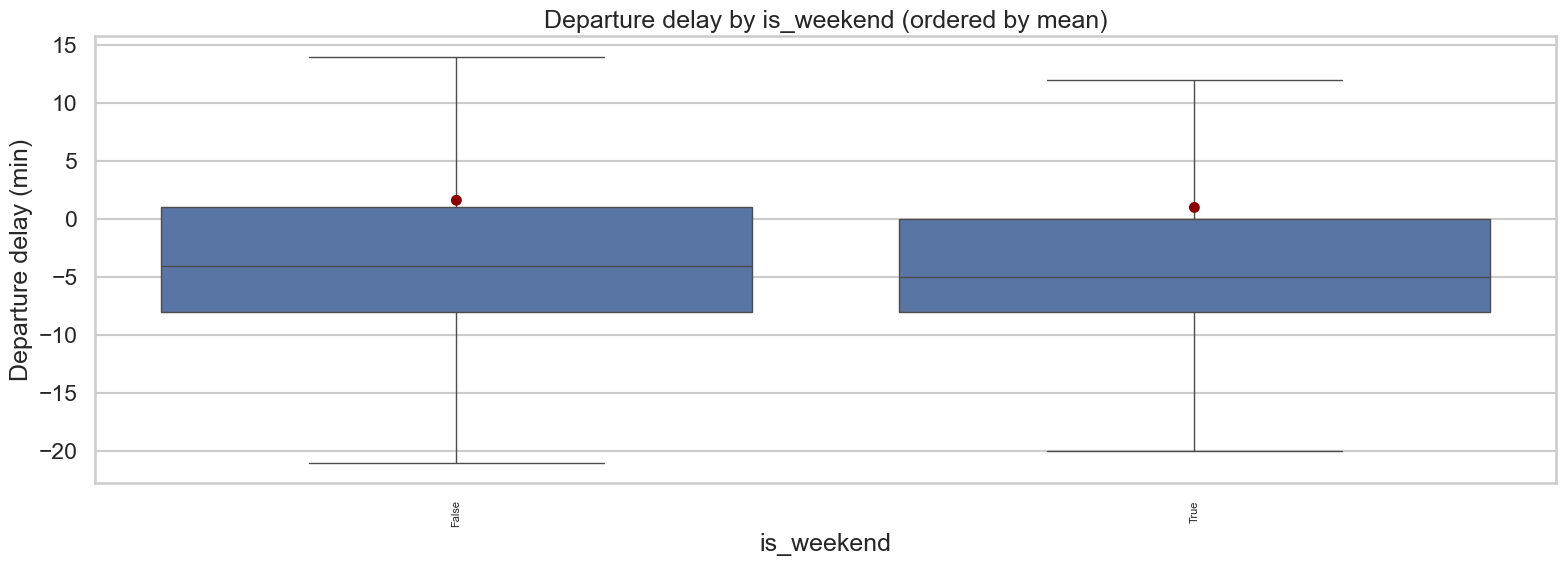

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


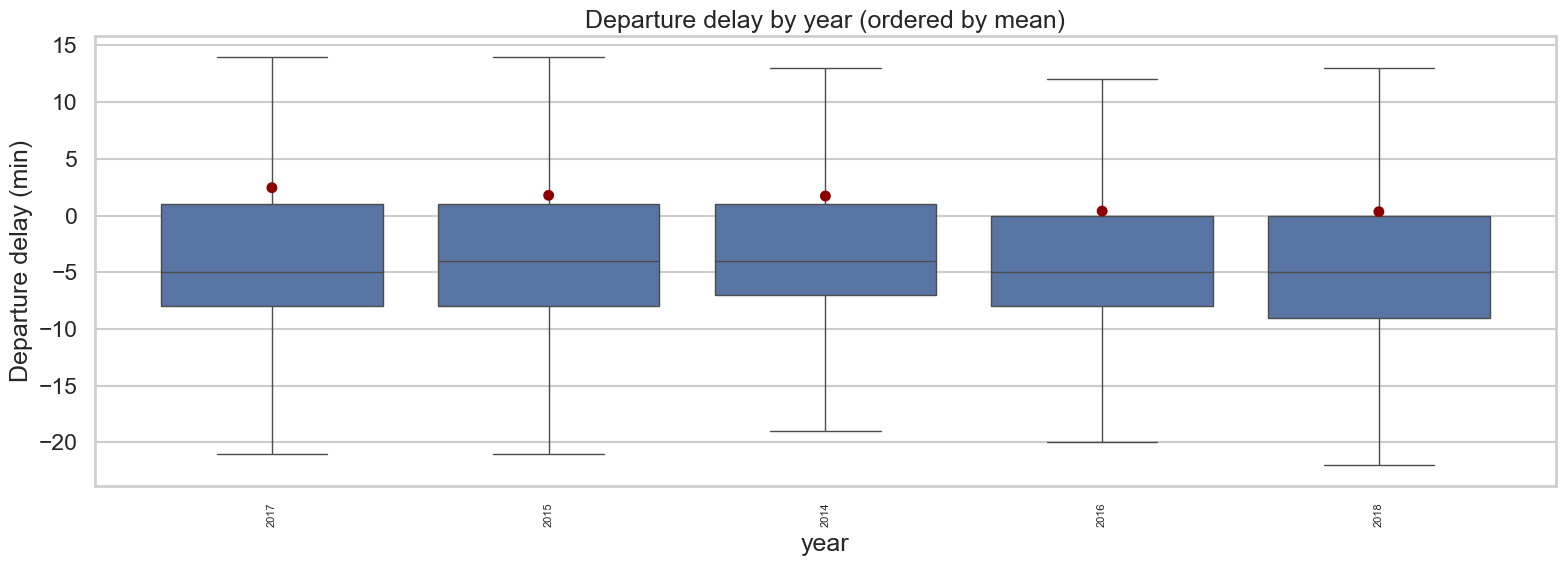

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


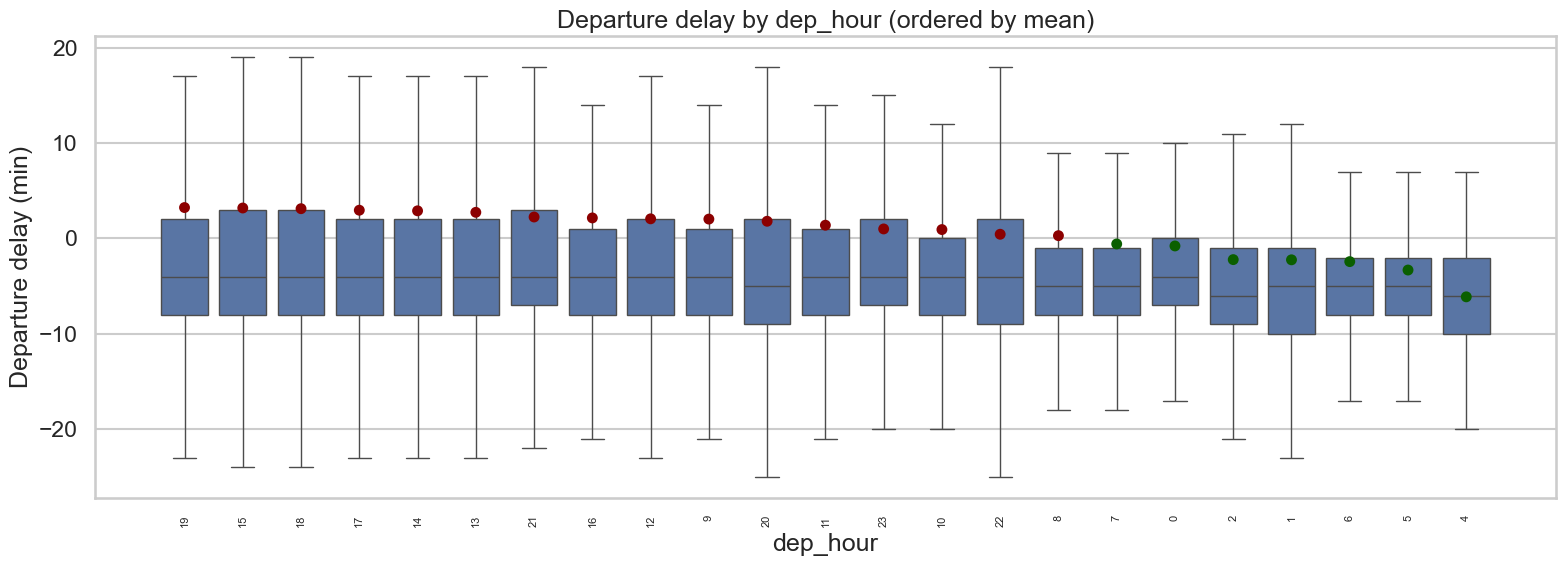

C:\Users\csoka\AppData\Local\Temp\ipykernel_11576\1812534810.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=xtick_fontsize)


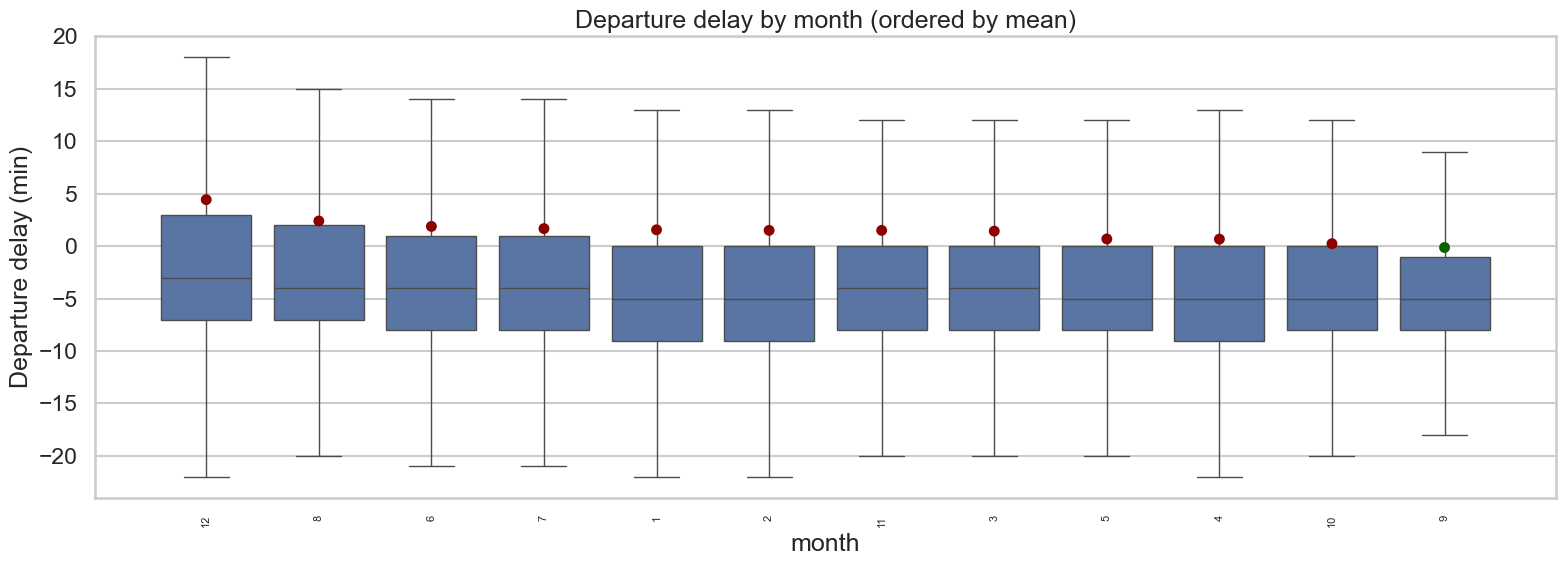


=== Correlation (numeric → dep_delay) ===
                    pearson_r  p_value significant_5pct
variable                                               
bank_pressure_hour      0.030      0.0                *
crs_elapsed_time        0.024      0.0                *
distance                0.019      0.0                *


c:\Users\csoka\anaconda3\envs\myenv310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 72
  warnings.warn('covariance of constraints does not have full '
c:\Users\csoka\anaconda3\envs\myenv310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 72
  warnings.warn('covariance of constraints does not have full '
c:\Users\csoka\anaconda3\envs\myenv310\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 386, but rank is 378
  warnings.warn('covariance of constraints does not have full '



=== One-way ANOVA (categorical → dep_delay): effect size η² (H²) ===
                      eta_squared(H2)  p_value significant_5pct
variable                                                       
route                           0.019    0.000                *
origin                          0.010    0.000                *
dest                            0.007    0.000                *
dep_hour                        0.004    0.000                *
month                           0.002    0.000                *
is_xmas_newyear                 0.001    0.000                *
weekday                         0.001    0.000                *
year                            0.001    0.000                *
season                          0.001    0.000                *
distance_bin                    0.001    0.000                *
is_peak_season                  0.000    0.000                *
is_summer_peak                  0.000    0.000                *
is_weekend                      0.

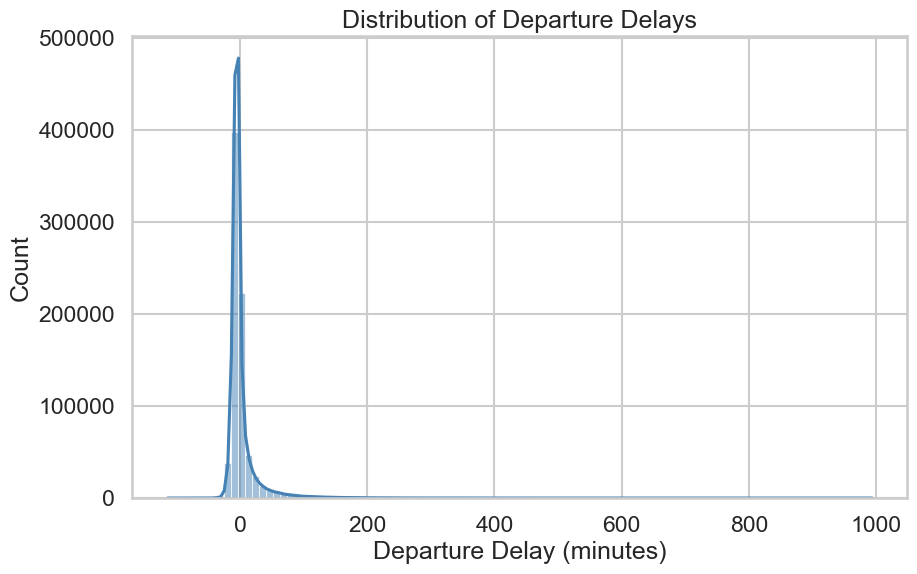

Number of flights with delay > 200 minutes: 2091
Number of flights with delay > 0 minutes: 194372
Train: (691659, 18), Test: (89664, 18)
    RandomForest | RMSE:    24.52 | R²:  0.012
LinearRegression | RMSE:    24.35 | R²:  0.025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 691659, number of used features: 177
[LightGBM] [Info] Start training from score 1.595334


c:\Users\csoka\anaconda3\envs\myenv310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


        LightGBM | RMSE:    24.39 | R²:  0.022

Sorted by RMSE (lower is better):
              model       rmse        r2
1  LinearRegression  24.348621  0.025163
2          LightGBM  24.391014  0.021766
0      RandomForest  24.516999  0.011634
✅ Saved Linear Regression predictions to prediction.csv
          fl_date origin dest crs_dep_time  dep_delay
785392 2018-06-01    DCA  SEA     08:00:00   1.051024
785393 2018-06-01    SEA  DCA     13:47:00   5.397644
785394 2018-06-01    DCA  SEA     18:55:00   4.253699
785395 2018-06-01    SEA  DCA     08:06:00   3.859824
785396 2018-06-01    JFK  SEA     07:26:00   5.203142
Pipeline finished.


In [4]:
%run code/1_clean.ipynb
%run code/2_analysis.ipynb
%run code/3_prediction.ipynb
print("Pipeline finished.")